#### 공부시간에 따른 점수 예측하기
- 목표 : 공부 시간으로 점수 예측
- 데이터셋 : 임의로 생성
- 피쳐/속성 : 공부시간
- 타겟/라벨 : 점수
- 학습방법 : 지도학습 > 회귀 
- 알고리즘 : 선형회귀 <== [조건] 데이터의 분포가 선형분포여야함

[1] 데이터 준비

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
#14개의 데이터셋

jumsu=range(7,100,7)
len(jumsu), jumsu[-1]

hour=list(range(1,29,2))
len(hour),hour

(14, [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27])

In [85]:
# list => DataFrame으로 변환
hourDF=pd.Series(hour).to_frame()

jumsuSR=pd.Series(jumsu)
print(hourDF.head(), jumsuSR.head(),sep='\n\n')

   0
0  1
1  3
2  5
3  7
4  9

0     7
1    14
2    21
3    28
4    35
dtype: int64


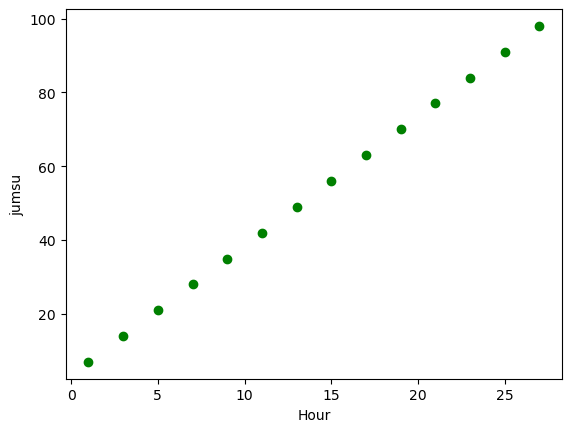

In [86]:
### 현재 데이터의 분포 확인
plt.plot(hourDF, jumsuSR, 'go')
plt.xlabel('Hour')
plt.ylabel('jumsu')
plt.show()

[2] 모델 생성 및 학습 진행

In [87]:
#모듈로딩
from sklearn.linear_model import LinearRegression

In [88]:
# 학습 모델 인스턴스 생성
model=LinearRegression()

In [89]:
# 학습 진행 => 최대한 많은 데이터를 만족하는 직선의 기울기와 절편 찾기
model.fit(hourDF,jumsuSR)

LinearRegression()

In [90]:
# 학습 후 모델 파라미터
print(f'기울기: {model.coef_} 절편 : {model.intercept_}')

기울기: [3.5] 절편 : 3.500000000000014


In [91]:
# y=ax+b
pre_jumsu = model.coef_[0] * hourDF + model.intercept_
pre_jumsu = pre_jumsu.values.reshape(-1)

In [92]:
# 실제 점수와 예측 점수의 차이 확인
real_jumsu=jumsuSR.to_numpy()
real_jumsu -pre_jumsu

array([-1.33226763e-14, -1.06581410e-14, -1.06581410e-14, -7.10542736e-15,
       -7.10542736e-15, -7.10542736e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.42108547e-14,  1.42108547e-14])

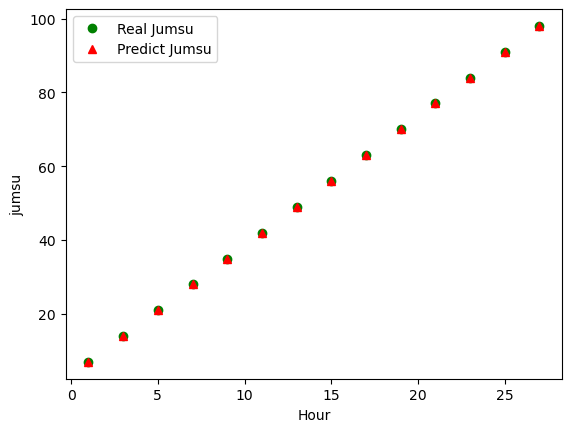

In [93]:
### 현재 데이터의 분포 확인
plt.plot(hourDF, jumsuSR, 'go',label='Real Jumsu')
plt.plot(hourDF, real_jumsu, 'r^',label='Predict Jumsu')
plt.xlabel('Hour')
plt.ylabel('jumsu')
plt.legend()
plt.show()

[3] 모델 성능 평가

In [94]:
model.score(hourDF,jumsuSR)

1.0

In [95]:
### 오차 계산 즉, 손실 / 비용함수 확인
### - root_mean_squared_error v.1.4  dltkd
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [96]:
import sklearn
sklearn.__version__

'1.3.0'

In [97]:
pre_y=model.predict(hourDF)

In [98]:
mse=mean_squared_error(jumsuSR, pre_y)
rmse=mean_squared_error(jumsuSR, pre_y, squared=False )
mae=mean_absolute_error(jumsuSR, pre_y)
r2=r2_score(jumsuSR, pre_y)

In [99]:
## 손실/비용함수 값은 0에 가까울수록
## 결정계수 값은 1에 가까울 수록 성능 좋은 모델
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2: {r2}')

mse : 6.857455154671224e-29
rmse : 8.280975277508818e-15
mae : 6.026924990822278e-15
r2: 1.0
